# PROJECT 2: Diamonds Dataset

## Summary
This Kaggle dataset contains multiple attributes, price included, of almost 54 000 diamonds.
1. Perform EDA (cleaning, stats and visualisation)
2. Load dataset into database
    - split into test and train models
3. Feature engineering
    - select features
    - create feature vector/ matrix
4. Apply Machine Learning (supervised)
    - train and test models
    - feed feature vector in ML model
    - use regression analysis
    - evaluate model

## Perform EDA on the Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


##### Read and preview the first 10 rows of the csv

In [2]:
diamonds = pd.read_csv('diamonds.csv')
diamonds.head(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


### Dataframe dimensions and statistical exploration

In [3]:
diamonds.shape

(53940, 11)

- 53940 rows of data/ evaluated diamonds
- 11 defined columns of associated attributes

In [4]:
diamonds.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

The dataset establishes multiple predictor variables that lead to one target variable,'Price'. Will revert back to this in feature engineering.  
##### Attribute information:
- 'Unnamed: 0': assuming this is the given index - come back to this when cleaning. 
- Carat: weight of diamond (0.2-5.01)
- Cut: describes cut quality (Fair, Good, Very Good, Premium, Ideal)
- Color: diamond colour (D being the best, J is the worst)
- Clarity: how clear the diamond is, or absence of inclusions/ blemishes - I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)
- Price: price of diamond (USD326-USD18,823)
- x: length in mm (0-10.74)
- y: width in mm (0-58.9)
- z: depth in mm (0-31.8)
- Depth: The Height of a Diamond, measured from the Culet to the table, divided by its average Girdle Diameter. Total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43-79)
- Table: width of top of diamond relative to widest point (The Width of the Diamond's Table expressed as a Percentage of its Average Diameter: 43-95)

In [5]:
diamonds.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
price           int64
x             float64
y             float64
z             float64
dtype: object

- Categorical Features (Qualitative) : Cut, Color, Clarity.
- Numerical Features (Quantitative) : Carat, Depth , Table , Price , X , Y, Z

In [6]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [7]:
diamonds.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


##### Questionable descriptors:
- note the minimum values. Will have to look into unrealistic "0" dimensions for x, y, z.

### Data Cleaning

##### Removal of unnecessary column "Unnamed: 0"

The dataframe already has an index, drop the unnecessary column.

In [8]:
diamonds.drop(['Unnamed: 0'] , axis=1 , inplace=True)
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [9]:
diamonds.shape

(53940, 10)

##### Check for null values

In [10]:
diamonds.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

Confirmed no Nulls, however will need to rectify the unrealistic "0" values within the data before analysis.

##### Handling unrealistic minimum values

According to the diamond dataset, x, y and z are dimension attributes (length, width and depth), so cannot be 0mm.

In [11]:
print("Rows where x = 0: {} ".format((diamonds.x==0).sum()))
print("Rows where y = 0: {} ".format((diamonds.y==0).sum()))
print("Rows where z = 0: {} ".format((diamonds.z==0).sum()))

Rows where x = 0: 8 
Rows where y = 0: 7 
Rows where z = 0: 20 


And again visually, in table format, as this involves a suprisingly low amount of incorrect data out of 53940 diamond samples.

In [12]:
diamonds.loc[(diamonds['x']==0) | (diamonds['y']==0) | (diamonds['z']==0)]

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


Interestingly, all x and y "0" values are met with a z "0". This means there are only 20 rows of data with invalid dimensions. Instead of filling them with a median to aid in statistical calculations/ predictive models, we can simply drop them as they only take up 0.00037% of the data.

In [13]:
diamonds = diamonds[(diamonds[['x','y','z']] != 0).all(axis=1)]

To confirm this was succesful:

In [14]:
print("Rows where x = 0: {} ".format((diamonds.x==0).sum()))
print("Rows where y = 0: {} ".format((diamonds.y==0).sum()))
print("Rows where z = 0: {} ".format((diamonds.z==0).sum()))

Rows where x = 0: 0 
Rows where y = 0: 0 
Rows where z = 0: 0 


In [15]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


- as can be seen, the unreliable rows of data have been removed to create an amended dataframe. This reduces elimination/ loss of data but will allow us to work with figures that are unbiased to outliers.

In [16]:
diamonds.shape

(53920, 10)

### Variables of Interest
##### NOMINAL: Amended numeric and visual correlations
- Numerical Features (Quantitative) : Carat, Depth , Table , Price , X , Y, Z

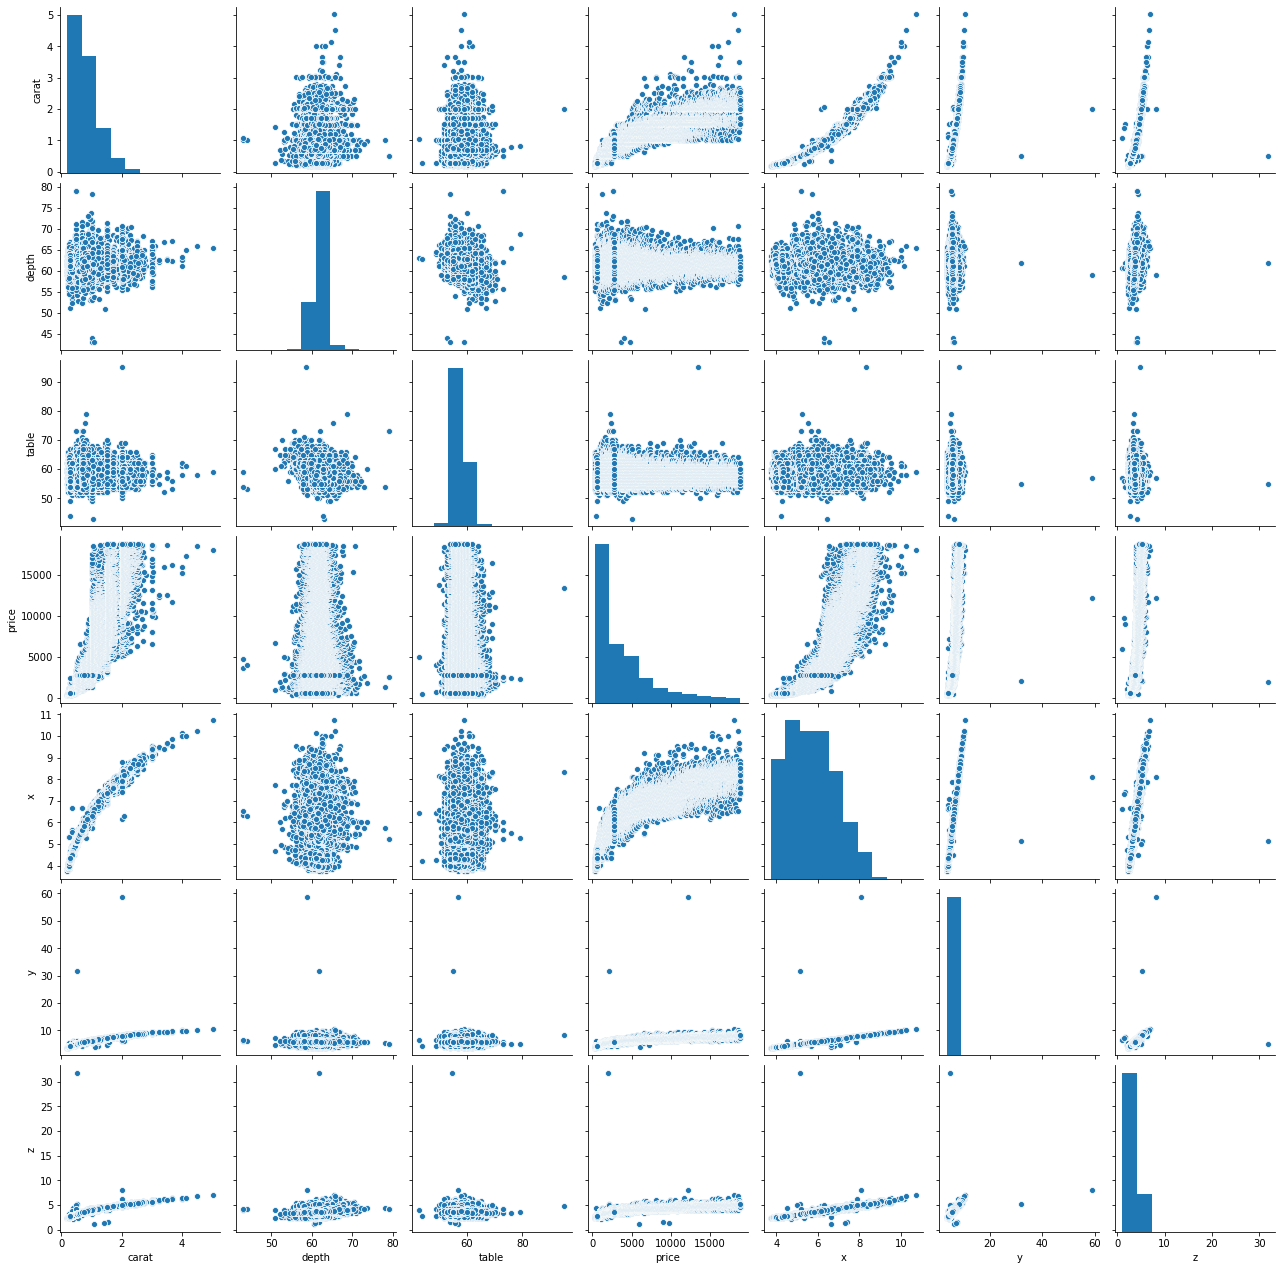

In [17]:
p=sns.pairplot(diamonds)

SUMMARY:
The pairplot simply reiterates the numerical findings of the correlation matrix in visual form. We can asses features or predictor variables that could be of exploral interest, as those mentioned above.

In [18]:
diamonds_corr = diamonds.corr()
diamonds_corr

,carat,depth,table,price,x,y,z
carat,1.000000,0.028259,0.181646,0.921592,0.977779,0.953991,0.961048
depth,0.028259,1.000000,-0.295733,-0.010729,-0.025017,-0.029069,0.095023
table,0.181646,-0.295733,1.000000,0.127245,0.196097,0.184493,0.152483
price,0.921592,-0.010729,0.127245,1.000000,0.887231,0.867864,0.868206
x,0.977779,-0.025017,0.196097,0.887231,1.000000,0.974918,0.975435
y,0.953991,-0.029069,0.184493,0.867864,0.974918,1.000000,0.956744
z,0.961048,0.095023,0.152483,0.868206,0.975435,0.956744,1.000000


Text(0.5, 1.0, 'Diamond Dataset Correlation Heat Map')

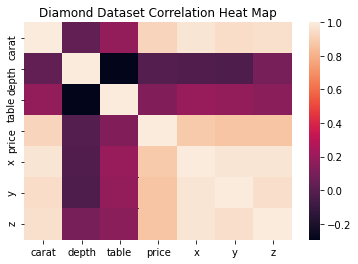

In [19]:
sns.heatmap(diamonds_corr)
plt.title('Diamond Dataset Correlation Heat Map')

- The dimension variables x, y and z have a very strong correlation with price (0.89, 0.87, 0.87 respectively). Interestingly, depth does not - even though it is mathematically derived from these variables.
- x, y and z and also strongly correlated with carat (0.98,	0.95, 0.96)
- Price is highly correlated with carat at 0.92
- Like depth, table has no noteworth correlations with any attribute either. Potentially drop these variables from future models?
- NOTE: x,y,z are highly correlated with eachother. When doing feature engineering, combine.

Text(0, 0.5, 'Frequency')

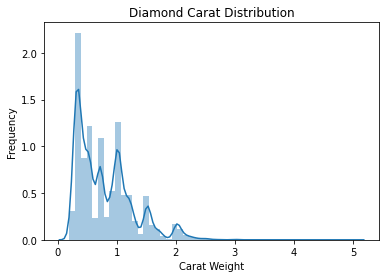

In [20]:
sns.distplot(diamonds['carat'])
plt.title('Diamond Carat Distribution')
plt.xlabel('Carat Weight')
plt.ylabel('Frequency')

- heavily right (positive) skewed, as most of the data is positioned to the left of the plot (less carat weight).

Text(0.5, 1.0, 'Carat vs Price Scatterplot (LinReg)')

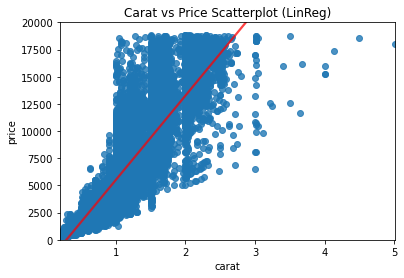

In [21]:
sns.regplot(x='carat', y= 'price', data=diamonds, line_kws={"color":"r","alpha":0.7})
plt.ylim(0,20000)
plt.title('Carat vs Price Scatterplot (LinReg)')

- Significant visual trend can be identified; as carat increases, so does price. This correctly cements the high correlation between the two variables in the correlation matrix.

Text(0, 0.5, 'Frequency')

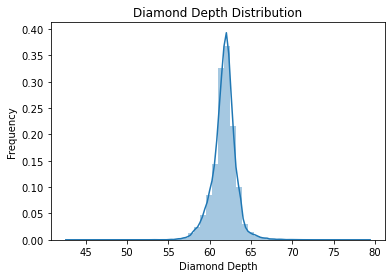

In [22]:
sns.distplot(diamonds['depth'])
plt.title('Diamond Depth Distribution')
plt.xlabel('Diamond Depth')
plt.ylabel('Frequency')

- Normally distributed acriss the data set, with slightly excess kurtosis. 

Text(0.5, 1.0, 'Depth vs Price Scatterplot (LinReg)')

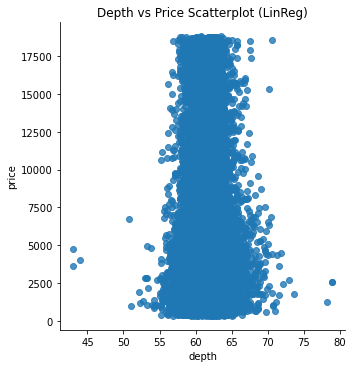

In [23]:
sns.lmplot(x='depth', y= 'price', data=diamonds, palette="hls", fit_reg=False)
plt.title('Depth vs Price Scatterplot (LinReg)')

- Seems to be little relation between depth and price. The significantly large sample seems to have a pretty consistent depth between 55-70, whilst varying in price across all instances.

Text(0, 0.5, 'Frequency')

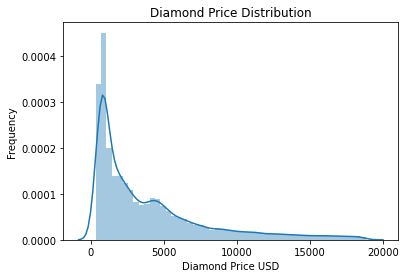

In [24]:
sns.distplot(diamonds['price'])
plt.title('Diamond Price Distribution')
plt.xlabel('Diamond Price USD')
plt.ylabel('Frequency')

- Prices were positively (right) skewed - most of the diamonds within the dataset fell below $5000 USD.

(2.0, 10.0)

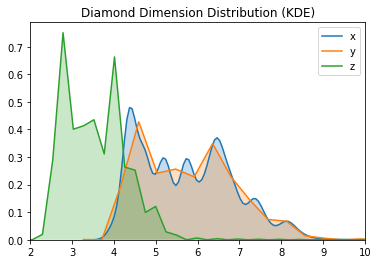

In [25]:
sns.kdeplot(diamonds['x'] ,shade=True)
sns.kdeplot(diamonds['y'] , shade=True)
sns.kdeplot(diamonds['z'] , shade= True)
plt.legend(loc='best')
plt.title('Diamond Dimension Distribution (KDE)')
plt.xlim(2,10)

- x (length) and y (width) were relatively normally distributed, whereas z (the depth) of the diamonds was predominently on the smaller sider (right skewwed)

##### CATEGORICAL: Qualitative data visuals and exploration

- Categorical Features (Qualitative) : Cut, Color, Clarity.

Text(0.5, 1.0, 'Diamonds Cut Barplot')

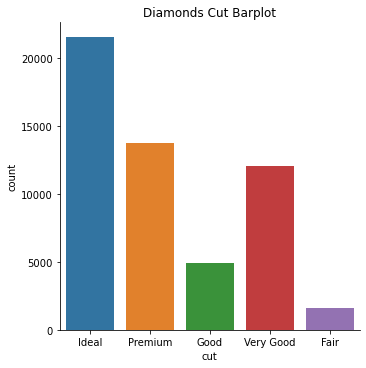

In [26]:
sns.catplot(x='cut', data=diamonds , kind='count' )
plt.title('Diamonds Cut Barplot')

- Most of the diamonds in the sample had an "ideal" cut, very few only had "fair"

Text(0.5, 1.0, 'Diamonds Cut vs Price Boxplot')

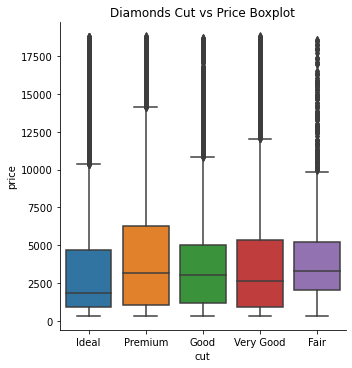

In [27]:
sns.catplot(x='cut', y = 'price', data=diamonds, kind='box')
plt.title('Diamonds Cut vs Price Boxplot')

- For the most part, the median prices are relatively low for the various categories in all qualitative data (cut, color and clarity; as seen in the below box plots too). The upper quartile is substancially larger, which suggests that in each sub category there's a selection of diamonds that are far more expenseve that the majority.

Text(0.5, 1.0, 'Diamonds Cut vs Price Barplot')

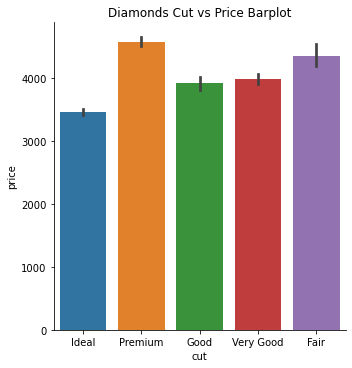

In [28]:
sns.catplot(x='cut', y='price', data=diamonds , kind='bar' )
plt.title('Diamonds Cut vs Price Barplot')

- seemingly the cut of the diamond had the opppostic correlation to price than expected (inverse). A cut that was "fair" seemed to be predominantly priced better than a diamonds with an "ideal" cut.

Text(0.5, 1.0, 'Diamonds Color Barplot')

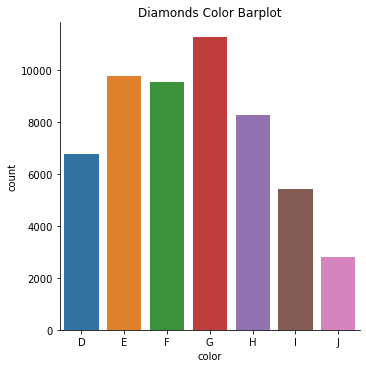

In [29]:
sns.catplot(x='color', data=diamonds , kind='count', order=['D','E','F','G','H','I','J'] )
plt.title('Diamonds Color Barplot')

- most had an color grading of "G", which is neither good nor bad!

Text(0.5, 1.0, 'Diamonds Color vs Price Boxplpot')

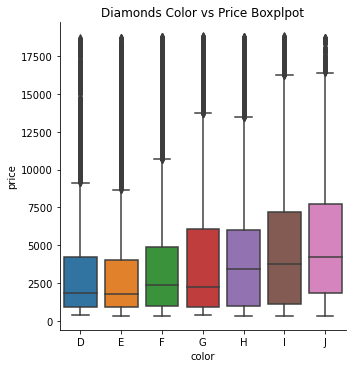

In [30]:
sns.catplot(x='color', y='price', data=diamonds , kind='box', order=['D','E','F','G','H','I','J'])
plt.title('Diamonds Color vs Price Boxplpot')

Text(0.5, 1.0, 'Diamonds Color vs Price Barplot')

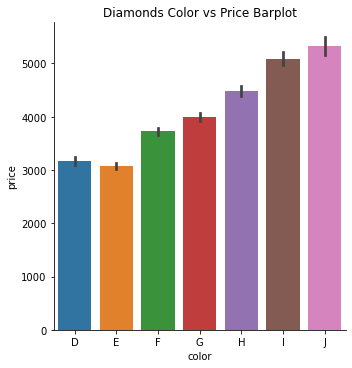

In [31]:
sns.catplot(x='color', y='price', data=diamonds , kind='bar', order=['D','E','F','G','H','I','J'])
plt.title('Diamonds Color vs Price Barplot')

- odd, as color gets worse (towards j, price becomes higher?). Again, the trend expected was inverse.

Text(0.5, 1.0, 'Diamonds Clarity Barplot')

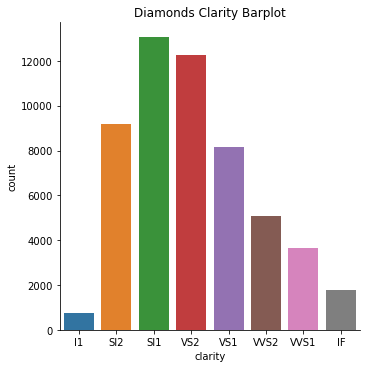

In [32]:
sns.catplot(x='clarity', data=diamonds , kind='count', order=['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF'])
plt.title('Diamonds Clarity Barplot')

- the majority of the diamonds within the sample had a clarity grading of SI2, SI1 and VS2

Text(0.5, 1.0, 'Diamonds Clarity vs Price Boxplot')

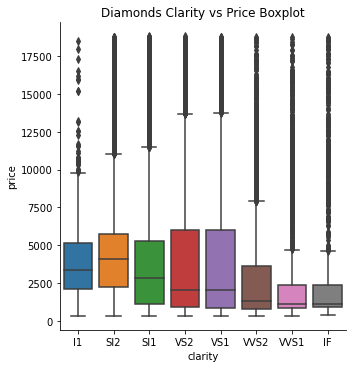

In [33]:
sns.catplot(x='clarity', y='price', data=diamonds , kind='box', order=['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF'])
plt.title('Diamonds Clarity vs Price Boxplot')

Text(0.5, 1.0, 'Diamonds Clarity vs Price Barplot')

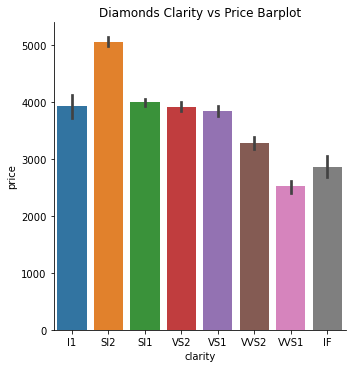

In [34]:
sns.catplot(x='clarity', y='price', data=diamonds , kind='bar', order=['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF'])
plt.title('Diamonds Clarity vs Price Barplot')

- Another inverse relationship from a categorical variable with price. As clarity increases, price goes down. Potentially, as size increases (x,y,z have high price correlations), clarity may decrease which henceforce has a minority effect on price in comparison?

Further exploration with carat and price, as they seem to have the strongest correlation on the matrix:

Text(0.5, 1.0, 'Diamond Price Relative to Carat and Color (LinReg)')

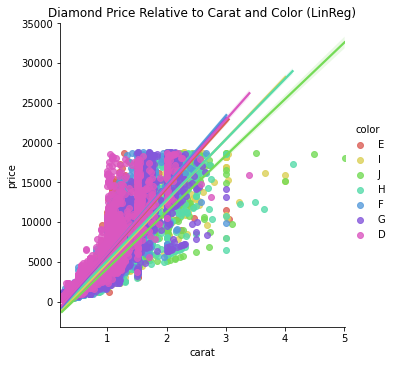

In [35]:
sns.lmplot(x='carat', y= 'price', data=diamonds, hue='color', palette="hls", fit_reg=True)
plt.title('Diamond Price Relative to Carat and Color (LinReg)')

- this multivariate scatterplot looks like unicorn vomit
- categorical predicor variables still not having a signicnant correlation with other features.

Text(0.5, 1.0, 'Diamond Price Relative to Carat and Clarity (LinReg)')

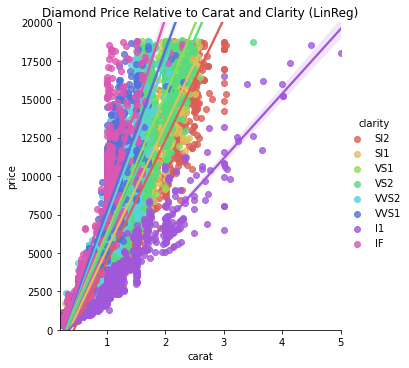

In [36]:
sns.lmplot(x='carat', y= 'price', data=diamonds, hue='clarity', palette="hls", fit_reg=True)
plt.ylim(0,20000)
plt.title('Diamond Price Relative to Carat and Clarity (LinReg)')

- The clarity variable seems to be having a slightly more noticible seperation here. However the order of the clarity levels in not significant (it doesnt change in order from best to worst)

## Load Diamond dataset into SQL database

In [37]:
import sqlite3
sqlite_db = 'diamonds.sqlite'
conn = sqlite3.connect(sqlite_db) 
c = conn.cursor()
import pandas as pd
from pandas.io import sql

In [38]:
pwd

'/Users/annaschreiner/Desktop/Institute of Data/Week 4/5 Friday (Mini Project #2 info)/Mini Project 2'

General pros of SQLite:
- doesn't function on a seperate server
- SQL is saved in a portable, single file
- allow efficient querying for futher data exploration, which will assist in later modeling and feature engineering.

In [39]:
diamonds.to_sql('diamonds_sql', con = conn, if_exists = 'replace', index = False)

##### Check by running queries:

Saving the sql database as a new dataframe to wrangle for this project:

In [40]:
diamonds_db = pd.read_sql_query('SELECT * FROM diamonds_sql;',conn)
diamonds_db

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53915,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53916,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53917,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53918,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


General exploration using SQL as follows.
Average price of diamond, grouped by carat:

In [41]:
pd.read_sql_query('SELECT AVG(price) AS avg_price FROM diamonds_sql GROUP BY carat;',conn)

,avg_price
0,365.166667
1,380.222222
2,391.400000
3,486.143345
4,505.185039
...,...
268,15984.000000
269,15223.000000
270,17329.000000
271,18531.000000


Average price of diamond, grouped by color:

In [42]:
pd.read_sql_query('SELECT color, avg(price) AS avg_price FROM diamonds_sql GROUP BY color ORDER BY COLOR',conn)

,color,avg_price
0,D,3168.106436
1,E,3076.752475
2,F,3725.080205
3,G,3996.876551
4,H,4480.942155
5,I,5089.973990
6,J,5323.818020


Average price of diamond, grouped by clarity:

In [43]:
pd.read_sql_query('SELECT clarity, avg(price) AS avg_price FROM diamonds_sql GROUP BY clarity ORDER BY clarity',conn)

,clarity,avg_price
0,I1,3926.189702
1,IF,2864.839106
2,SI1,3994.112608
3,SI2,5060.440174
4,VS1,3839.144308
5,VS2,3922.866819
6,VVS1,2519.512315
7,VVS2,3283.737071


Combining measureable dimensions into new category, volume (will consider this again in feature engineering):

In [44]:
pd.read_sql_query('SELECT x, y, z, x*y*z AS volume FROM diamonds_sql ORDER BY volume LIMIT 10',conn)

,x,y,z,volume
0,3.73,3.68,2.31,31.707984
1,3.73,3.71,2.33,32.243239
2,3.81,3.78,2.24,32.260032
3,3.79,3.75,2.27,32.262375
4,3.79,3.77,2.26,32.291558
5,3.77,3.72,2.31,32.396364
6,3.76,3.73,2.33,32.677784
7,3.74,3.71,2.36,32.745944
8,3.84,3.80,2.28,33.269760
9,3.81,3.78,2.32,33.412176


Observing average price and volume of diamonds by carat:

In [45]:
pd.read_sql_query('SELECT carat, avg(price) AS avg_price, (x*y*z) AS volume FROM diamonds_sql GROUP BY carat ORDER BY carat DESC',conn)

,carat,avg_price,volume
0,5.01,18018.000000,790.133208
1,4.50,18531.000000,698.455296
2,4.13,17329.000000,633.355000
3,4.01,15223.000000,631.894380
4,4.00,15984.000000,627.841214
...,...,...,...
268,0.24,505.185039,38.693952
269,0.23,486.143345,38.202030
270,0.22,391.400000,36.425214
271,0.21,380.222222,34.505856


## Feature Engingeering

##### Set target variable for Diamond dataset

In [46]:
y = diamonds_db['price']

##### Set predictor variables:

Check correlation in relation to target variable

In [47]:
diamonds_db.corr()['price'].sort_values()

depth   -0.010729
table    0.127245
y        0.867864
z        0.868206
x        0.887231
carat    0.921592
price    1.000000
Name: price, dtype: float64

Note: x,y,z were intitally very highly correlated as seen in the initial correlation heat map. For ease of evaluation, I will replace these three features with one single feature, Volume

In [48]:
diamonds_db['volume'] = diamonds_db['x']*diamonds_db['y']*diamonds_db['z']
diamonds_db.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250


(0.0, 1000.0)

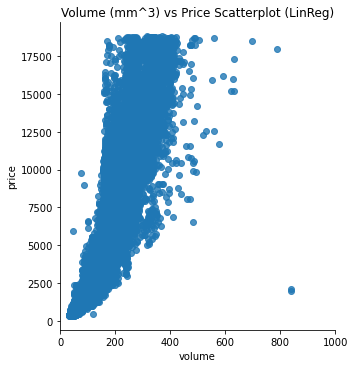

In [49]:
sns.lmplot(x='volume', y= 'price', data=diamonds_db, palette="hls", fit_reg=False)
plt.title('Volume (mm^3) vs Price Scatterplot (LinReg)')
plt.xlim(0,1000)

Using python maping to encode categorical variables (into new columns) for correlation determination and future ML modeling.

In [50]:
labelmap_cut = {'Fair':1,'Good':2,'Very Good':3,'Premium':4,'Ideal':5}
diamonds_db['cut_num'] = [labelmap_cut.get(item) for item in diamonds_db['cut']]

labelmap_color = {'J':1,'I':2,'H':3,'G':4,'F':5,'E':6,'D':7}
diamonds_db['color_num'] = [labelmap_color.get(item) for item in diamonds_db['color']]

labelmap_clarity = {'I1':1,'SI2':2,'SI1':3,'VS2':4,'VS1':5,'VVS2':6,'VVS1':7,'IF':8}
diamonds_db['clarity_num'] = [labelmap_clarity.get(item) for item in diamonds_db['clarity']]

In [51]:
diamonds_db.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,volume,cut_num,color_num,clarity_num
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030,5,6,2
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856,4,6,3
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885,2,6,5
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580,4,2,4
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250,2,1,2


- note: three aditional columns which represent the categorical data in numerical form for regression procession and correlation exploration

Check correlation with encoded categorical labels

In [52]:
diamonds_db.corr()['price'].sort_values()

color_num     -0.172431
clarity_num   -0.146789
cut_num       -0.053491
depth         -0.010729
table          0.127245
y              0.867864
z              0.868206
x              0.887231
volume         0.904255
carat          0.921592
price          1.000000
Name: price, dtype: float64

- as recognised previously in the barplots, the categorical varibles have a suprisingly weak and inverse relationsip with price, unlike carat and volume.

I chose the features which are strongly correlated with the target variable (price), namely, carat and volume. Out of interest (although they seem invertly and weakly correlated) I will also be exploring the categorical attributes (color, clarity and cut). The resulting feature matrix is as follows:

In [53]:
predictor_columns = ['carat','volume','cut_num','clarity_num','color_num']
X = diamonds_db[predictor_columns]
X.head()

,carat,volume,cut_num,clarity_num,color_num
0,0.23,38.202030,5,2,6
1,0.21,34.505856,4,3,6
2,0.23,38.076885,2,5,6
3,0.29,46.724580,4,4,2
4,0.31,51.917250,2,2,1


## Split data into training and testing

- spliting the SQL database - is this correct? Check with bryce and make sure

In [54]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold 

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [56]:
print("Total dataset: {}".format(diamonds_db.shape))
print("Training set (70%): {}".format(X_train.shape))
print("Test set (30%): {}".format(X_test.shape))

Total dataset: (53920, 14)
Training set (70%): (37744, 5)
Test set (30%): (16176, 5)


## Apply Machine Learning

Regression is a statistical method that aids in quantifying the relationship between the correlated variables. It involves estimating the coefficient of the independent variable (or multiple, as is in this feature vector) and then measuring the reliability of the estimated coefficient.

##### Create a base model using Linear Regression

Create Model

In [57]:
model = LinearRegression()

Fit and score model on training data

In [58]:
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.9024053170657957

Score model on test data

In [59]:
model.score(X_test, y_test)

0.9084227844124313

Check coefficient

In [60]:
model.coef_

array([8.59512428e+03, 1.12781292e+00, 1.59878030e+02, 5.25080118e+02,
       3.20914629e+02])

Visualise in a dataframe

In [61]:
model_coef_df = pd.DataFrame({'feature': X.columns, 'coefficient': model.coef_})
model_coef_df

,feature,coefficient
0,carat,8595.124283
1,volume,1.127813
2,cut_num,159.878030
3,clarity_num,525.080118
4,color_num,320.914629


In [62]:
def view_coeff(X, model):
    model_coefs = pd.DataFrame({'variable': X.columns,
                                'coef': model.coef_,
                                'abs_coef': np.abs(model.coef_)})
    model_coefs.sort_values('abs_coef', inplace=True, ascending=False)
    sns.barplot(x="variable", y="coef", data=model_coefs)

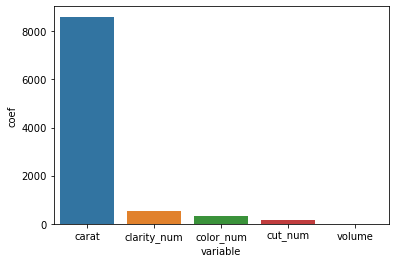

In [63]:
view_coeff(X, model)

- Supridingly low volume coeff? There should be very high correlation
- It is there in purple, just very small? It appears in the ridge regression model below.

##### Calculate Ridge Regression Model

Create a model object to hold the modelling parameters, then keep track of the intermediate results for coefficients and errors

In [64]:
clf = Ridge()
coefs = []
errors = []

Create a range of alphas to calculate, then train the model with different regularisation strengths

In [65]:
ridge_alphas = np.logspace(-6, 6, 200)

for a in ridge_alphas:
    clf.set_params(alpha = a)
    clf.fit(X, y)
    coefs.append(clf.coef_)
    errors.append(mean_squared_error(clf.coef_, model.coef_))

Visual representation of coefficient of Ridge Model, displaying:
- Ridge coefficients as a function of the regularisation
- Coefficient error as a function of the regularisation

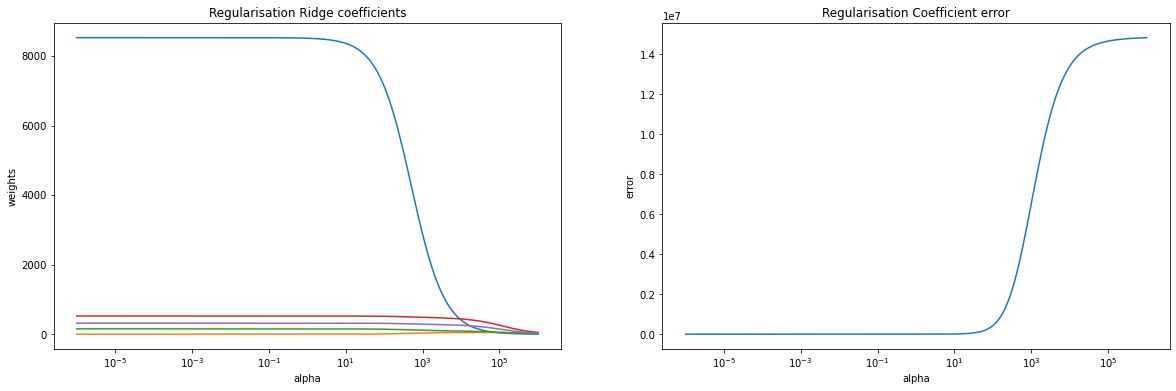

In [66]:
plt.figure(figsize = (20, 6))

plt.subplot(121)
ax = plt.gca()
ax.plot(ridge_alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Regularisation Ridge coefficients')
plt.axis('tight')

plt.subplot(122)
ax = plt.gca()
ax.plot(ridge_alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.title('Regularisation Coefficient error')
plt.axis('tight')

plt.show()

Finding an optimal value for Ridge Regression alpha (strength of regularisation)

In [67]:
optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(X, y)
print('Alpha:', optimal_ridge.alpha_)
print('Score:', optimal_ridge.score(X, y))

Alpha: 164467.61779946627
Score: 0.8466536168846336


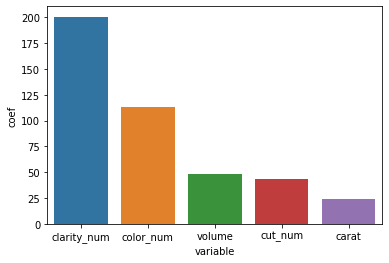

In [68]:
view_coeff(X, optimal_ridge)

##### Cross Validation

Set up 5-fold cross validation (Using method taught in Lab 2.1.3)

In [69]:
k_fold = KFold(5, shuffle=True)
train_scores = []
train_rmse = []
test_scores = []
test_rmse = []

In [70]:
for k, (train, test) in enumerate(k_fold.split(X)):
    
    # Get training and test sets for X and y
    X_train = X.iloc[train, ]
    y_train = y.iloc[train, ]
    X_test = X.iloc[test, ]
    y_test = y.iloc[test, ]
    
    # Fit model with training set
    model.fit(X_train, y_train)
    
    # Make predictions with training and test set
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    
    # Score R2 and RMSE on training and test sets and store in list
    train_scores.append(model.score(X_train, y_train))
    test_scores.append(model.score(X_test, y_test))
    
    train_rmse.append(mean_squared_error(y_train, train_preds, squared=False))
    test_rmse.append(mean_squared_error(y_test, test_preds, squared=False))

# Create dataframe to display r2 and rmse scores
diamonds_metrics_df = pd.DataFrame({'Training R2': train_scores, 
                           'Test R2': test_scores, 
                           'Training RMSE': train_rmse, 
                           'Test RMSE': test_rmse},
                          index=[i+1 for i in range(5)])

diamonds_metrics_df

,Training R2,Test R2,Training RMSE,Test RMSE
1,0.905114,0.876450,1226.744926,1408.098713
2,0.904147,0.904316,1235.556149,1228.961515
3,0.903051,0.908619,1240.267070,1210.027945
4,0.904357,0.903366,1235.599145,1229.070003
5,0.904746,0.901912,1229.662739,1252.392034


The coefficient of determination (R^2) is the proportion of the variance in the dependent variable (the response) that is explained (i.e., predictable) from the independent variables (the predictors).
- R2 is the percentage of the observed variance from the mean that is predicted by your model. It always falls between 0 and 1, and a higher number is better.
- R2 is exceptionally high for the training and test data (all approx. 0.9, which means that almost all the total deviation in Y(price) from the predicted model is explained by the equation.

Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are (it tells you how concentrated the data is around the line of best fit).